In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
df=pd.read_csv("Heart Attack.csv",encoding="latin1")

In [5]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [4]:
df.tail()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive
1318,51,1,94,157,79,134.0,50.89,1.770,positive


In [6]:
df.shape

(1319, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [8]:
df.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [10]:
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
1314    False
1315    False
1316    False
1317    False
1318    False
Length: 1319, dtype: bool

In [12]:
X = df.drop('class', axis=1)
y = df['class']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(len(X_train))
print(len(X_test))

923
396


In [16]:
clf = DecisionTreeClassifier(max_depth=3,splitter="random",criterion='entropy')

In [18]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='random')

In [19]:
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X.columns,
    class_names=y.unique(),
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("heart_attack.png")

True

In [20]:
y_pred = clf.predict(X_test)
print(len(y_pred))

396


In [21]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.61
Precision: 0.59
Recall: 0.61
F1 Score: 0.60


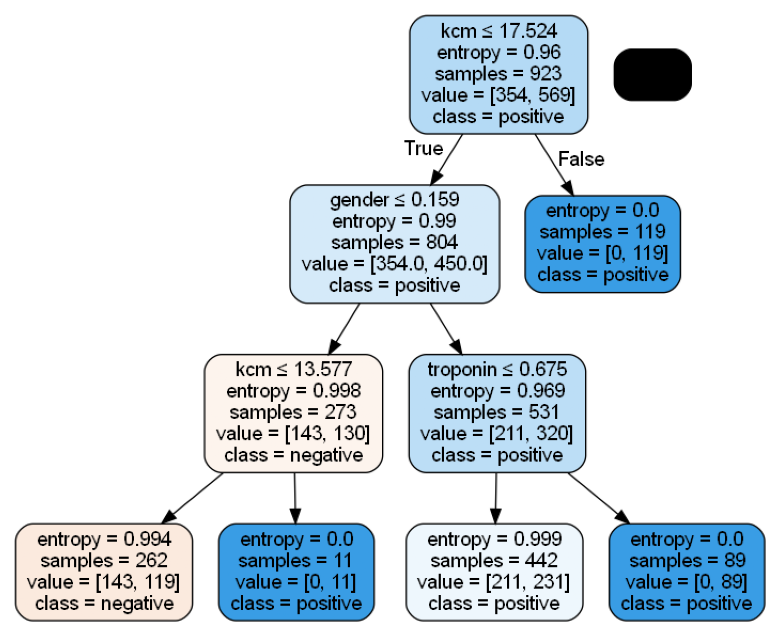

In [22]:
plt.figure(figsize=(12, 8))
plt.imshow(plt.imread("heart_attack.png"))
plt.axis('off')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [24]:
rf_clf = RandomForestClassifier(n_estimators=100,criterion="entropy", random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [25]:
rf_y_pred = rf_clf.predict(X_test)

In [26]:
rf_accuracy = metrics.accuracy_score(y_test, rf_y_pred)
rf_precision = metrics.precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = metrics.recall_score(y_test, rf_y_pred, average='weighted')
rf_f1_score = metrics.f1_score(y_test, rf_y_pred, average='weighted')

# Print evaluation metrics for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1_score:.2f}")

Random Forest Metrics:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


In [27]:
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [28]:
gb_y_pred = gb_clf.predict(X_test)

In [29]:
gb_accuracy = metrics.accuracy_score(y_test, gb_y_pred)
gb_precision = metrics.precision_score(y_test, gb_y_pred, average='weighted')
gb_recall = metrics.recall_score(y_test, gb_y_pred, average='weighted')
gb_f1_score = metrics.f1_score(y_test, gb_y_pred, average='weighted')

# Print evaluation metrics for Gradient Boosting
print("\nGradient Boosting Metrics:")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1 Score: {gb_f1_score:.2f}")


Gradient Boosting Metrics:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
